# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu 
### Jacob Thomas

# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Defining the Parameters

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

## Load Data

In [4]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[6], verbose=True)

Training/Valid data shape: (236, 22, 1000)
Test data shape: (49, 22, 1000)


## Preprocessing

In [5]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [6]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Comparing different models for Subject 6 and giving a comparative perspective

### The model architecture can be found in the models.py file

## CNN

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.46870
	Train loss: 0.04423, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02863, Accuracy: 15/48 (31.25%)
	Test loss: 0.02839, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.45246
	Train loss: 0.04429, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02874, Accuracy: 15/48 (31.25%)
	Test loss: 0.02833, Accuracy: 9/49 (18.37%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.42037
	Train loss: 0.04417, Accuracy: 55/188 (29.26%)
	Validation loss: 0.02895, Accuracy: 9/48 (18.75%)
	Test loss: 0.02836, Accuracy: 13/49 (26.53%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.35331
	Train loss: 0.04401, Accuracy: 58/188 (30.85%)
	Validation loss: 0.02901, Accuracy: 12/48 (25.00%)
	Test loss: 0.02820, Accuracy: 13/49 (26.53%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.34897
	Train loss: 0.04370, Accuracy: 54/188 (28.72%)
	Validation loss: 0.02895, Accuracy: 14/48 (29.17%)
	Test loss: 0.02830

Best validation accuracy:
0.3391

Best test accuracy:
0.4694

## Plotting Metrics v/s Number of Epochs: 
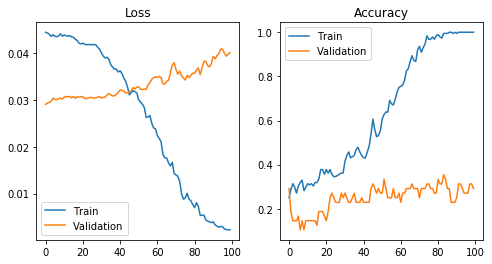

## LSTM

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.48049
	Train loss: 0.04449, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02953, Accuracy: 7/48 (14.58%)
	Test loss: 0.02788, Accuracy: 15/49 (30.61%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.42913
	Train loss: 0.04458, Accuracy: 49/188 (26.06%)
	Validation loss: 0.02974, Accuracy: 8/48 (16.67%)
	Test loss: 0.02778, Accuracy: 15/49 (30.61%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.38262
	Train loss: 0.04451, Accuracy: 52/188 (27.66%)
	Validation loss: 0.02977, Accuracy: 9/48 (18.75%)
	Test loss: 0.02770, Accuracy: 15/49 (30.61%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.33088
	Train loss: 0.04428, Accuracy: 55/188 (29.26%)
	Validation loss: 0.02977, Accuracy: 11/48 (22.92%)
	Test loss: 0.02758, Accuracy: 15/49 (30.61%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.38583
	Train loss: 0.04346, Accuracy: 61/188 (32.45%)
	Validation loss: 0.02964, Accuracy: 7/48 (14.58%)
	Test loss: 0.02769, 

Best validation accuracy:
0.3725

Best test accuracy:
0.3061

## Plotting Metrics v/s Number of Epochs: 
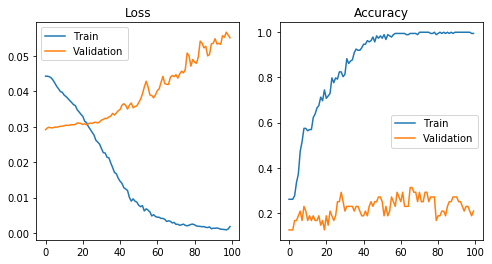

## CNN + LSTM

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.40096
	Train loss: 0.04436, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02906, Accuracy: 15/48 (31.25%)
	Test loss: 0.02815, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.39571
	Train loss: 0.04433, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02905, Accuracy: 15/48 (31.25%)
	Test loss: 0.02816, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.39329
	Train loss: 0.04429, Accuracy: 48/188 (25.53%)
	Validation loss: 0.02902, Accuracy: 15/48 (31.25%)
	Test loss: 0.02817, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.39074
	Train loss: 0.04424, Accuracy: 65/188 (34.57%)
	Validation loss: 0.02900, Accuracy: 13/48 (27.08%)
	Test loss: 0.02818, Accuracy: 12/49 (24.49%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.38725
	Train loss: 0.04416, Accuracy: 65/188 (34.57%)
	Validation loss: 0.02897, Accuracy: 12/48 (25.00%)
	Test loss: 0.028

Best validation accuracy:
0.4075

Best test accuracy:
0.3673

## Plotting Metrics v/s Number of Epochs: 
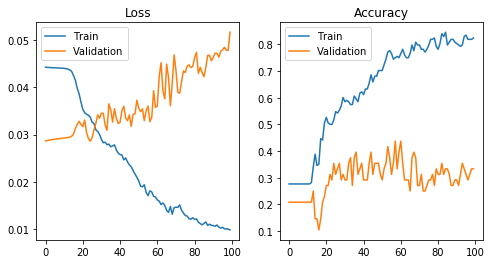


## GRU

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.30629
	Train loss: 0.04440, Accuracy: 59/188 (31.38%)
	Validation loss: 0.02949, Accuracy: 17/48 (35.42%)
	Test loss: 0.02836, Accuracy: 14/49 (28.57%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.40364
	Train loss: 0.04397, Accuracy: 66/188 (35.11%)
	Validation loss: 0.02950, Accuracy: 12/48 (25.00%)
	Test loss: 0.02865, Accuracy: 13/49 (26.53%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.36512
	Train loss: 0.04299, Accuracy: 70/188 (37.23%)
	Validation loss: 0.02929, Accuracy: 11/48 (22.92%)
	Test loss: 0.02900, Accuracy: 8/49 (16.33%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.34483
	Train loss: 0.04211, Accuracy: 81/188 (43.09%)
	Validation loss: 0.02926, Accuracy: 11/48 (22.92%)
	Test loss: 0.02905, Accuracy: 11/49 (22.45%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.35645
	Train loss: 0.04159, Accuracy: 80/188 (42.55%)
	Validation loss: 0.02934, Accuracy: 9/48 (18.75%)
	Test loss: 0.02899

Best validation accuracy:
0.3375

Best test accuracy:
0.3469

## Plotting Metric v/s Number of Epochs: 
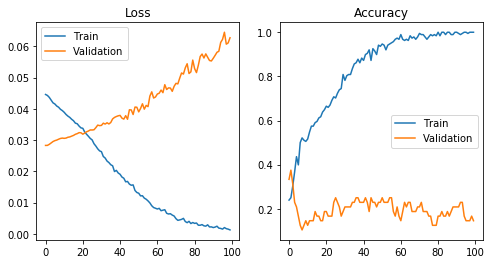

## CNN + GRU

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/188 (0.00%)]		Loss: 1.38722
	Train loss: 0.04427, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02877, Accuracy: 15/48 (31.25%)
	Test loss: 0.02841, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 2 [0/188 (0.00%)]		Loss: 1.38320
	Train loss: 0.04421, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02881, Accuracy: 15/48 (31.25%)
	Test loss: 0.02838, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 3 [0/188 (0.00%)]		Loss: 1.38058
	Train loss: 0.04418, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02882, Accuracy: 15/48 (31.25%)
	Test loss: 0.02836, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 4 [0/188 (0.00%)]		Loss: 1.38259
	Train loss: 0.04415, Accuracy: 47/188 (25.00%)
	Validation loss: 0.02882, Accuracy: 15/48 (31.25%)
	Test loss: 0.02835, Accuracy: 10/49 (20.41%)

Training Progress: 	Epoch 5 [0/188 (0.00%)]		Loss: 1.38692
	Train loss: 0.04410, Accuracy: 59/188 (31.38%)
	Validation loss: 0.02885, Accuracy: 13/48 (27.08%)
	Test loss: 0.028

Best validation accuracy:
0.357

Best test accuracy:
0.3878

## Plotting Metrics v/s Number of Epochs:
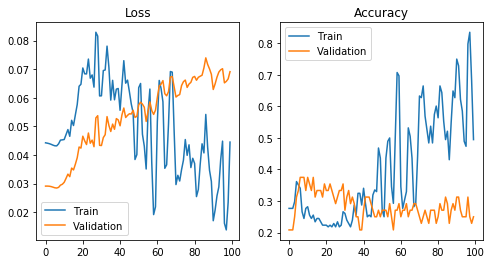